In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss= keras.losses.kullback_leibler_divergence,
    metrics=['accuracy']
)

In [6]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [7]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 13s 10ms/step - loss: 20.7547 - accuracy: 0.1179 - val_loss: 20.6661 - val_accuracy: 0.1282
Epoch 2/10
274/274 [==============================] - 2s 8ms/step - loss: 20.7491 - accuracy: 0.1315 - val_loss: 20.6656 - val_accuracy: 0.1351
Epoch 3/10
274/274 [==============================] - 2s 7ms/step - loss: 20.7489 - accuracy: 0.1345 - val_loss: 20.6655 - val_accuracy: 0.1319
Epoch 4/10
274/274 [==============================] - 2s 7ms/step - loss: 20.7488 - accuracy: 0.1315 - val_loss: 20.6654 - val_accuracy: 0.1289
Epoch 5/10
274/274 [==============================] - 2s 7ms/step - loss: 20.7488 - accuracy: 0.1293 - val_loss: 20.6654 - val_accuracy: 0.1281
Epoch 6/10
274/274 [==============================] - 2s 7ms/step - loss: 20.7487 - accuracy: 0.1289 - val_loss: 20.6654 - val_accuracy: 0.1291
Epoch 7/10
274/274 [==============================] - 2s 8ms/step - loss: 20.7487 - accuracy: 0.1276 - val_loss: 20.6654 - val_accurac

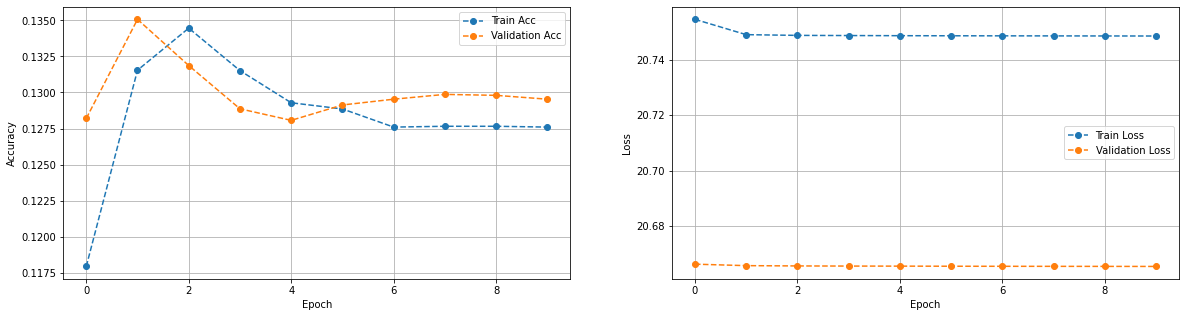

In [8]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [9]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 2s 9ms/step - loss: 20.7486 - accuracy: 0.1288 - val_loss: 20.6653 - val_accuracy: 0.1299
Epoch 2/15
274/274 [==============================] - 2s 7ms/step - loss: 20.7486 - accuracy: 0.1300 - val_loss: 20.6653 - val_accuracy: 0.1299
Epoch 3/15
274/274 [==============================] - 2s 7ms/step - loss: 20.7486 - accuracy: 0.1302 - val_loss: 20.6653 - val_accuracy: 0.1296
Epoch 4/15
274/274 [==============================] - 2s 8ms/step - loss: 20.7486 - accuracy: 0.1298 - val_loss: 20.6653 - val_accuracy: 0.1300
Epoch 5/15
274/274 [==============================] - 2s 8ms/step - loss: 20.7486 - accuracy: 0.1309 - val_loss: 20.6652 - val_accuracy: 0.1305
Epoch 6/15
274/274 [==============================] - 2s 7ms/step - loss: 20.7486 - accuracy: 0.1313 - val_loss: 20.6652 - val_accuracy: 0.1300
Epoch 7/15
274/274 [==============================] - 2s 7ms/step - loss: 20.7486 - accuracy: 0.1308 - val_loss: 20.6652 - val_accuracy:

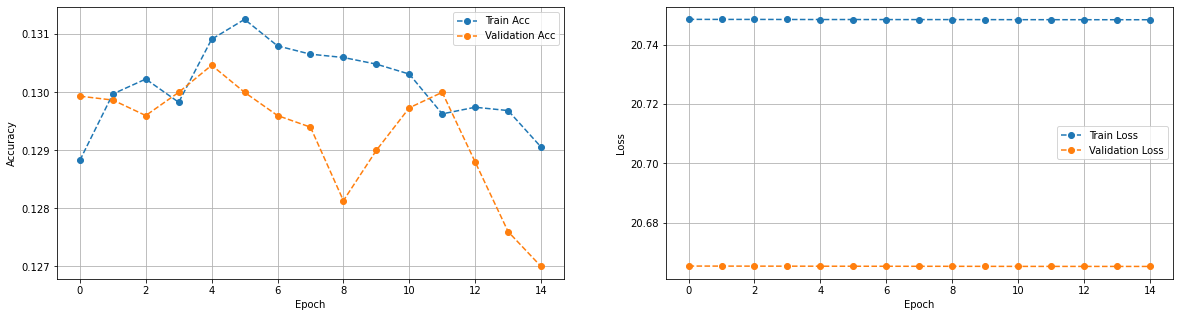

In [10]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [11]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 2s 8ms/step - loss: 20.7485 - accuracy: 0.1287 - val_loss: 20.6652 - val_accuracy: 0.1259
Epoch 2/20
274/274 [==============================] - 2s 8ms/step - loss: 20.7485 - accuracy: 0.1280 - val_loss: 20.6652 - val_accuracy: 0.1251
Epoch 3/20
274/274 [==============================] - 2s 7ms/step - loss: 20.7485 - accuracy: 0.1279 - val_loss: 20.6652 - val_accuracy: 0.1236
Epoch 4/20
274/274 [==============================] - 2s 7ms/step - loss: 20.7485 - accuracy: 0.1277 - val_loss: 20.6651 - val_accuracy: 0.1238
Epoch 5/20
274/274 [==============================] - 2s 8ms/step - loss: 20.7485 - accuracy: 0.1275 - val_loss: 20.6651 - val_accuracy: 0.1234
Epoch 6/20
274/274 [==============================] - 2s 8ms/step - loss: 20.7485 - accuracy: 0.1271 - val_loss: 20.6651 - val_accuracy: 0.1233
Epoch 7/20
274/274 [==============================] - 2s 7ms/step - loss: 20.7485 - accuracy: 0.1271 - val_loss: 20.6651 - val_accuracy:

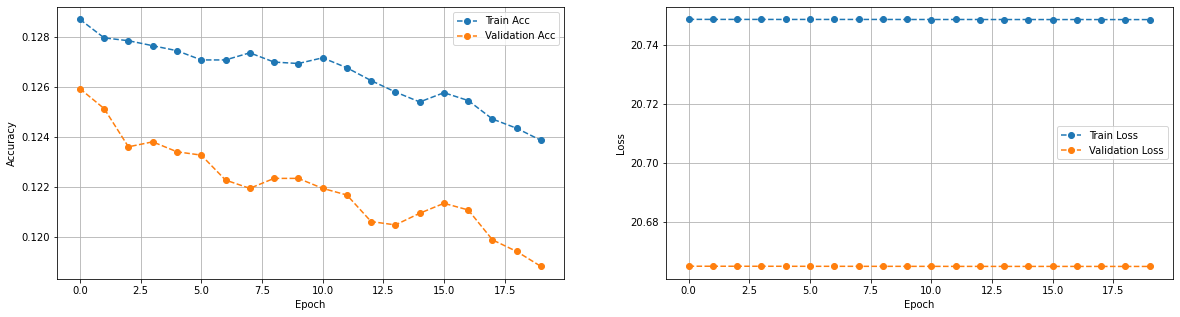

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [13]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1232 - val_loss: 20.6651 - val_accuracy: 0.1186
Epoch 2/25
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1228 - val_loss: 20.6651 - val_accuracy: 0.1174
Epoch 3/25
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1219 - val_loss: 20.6651 - val_accuracy: 0.1171
Epoch 4/25
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1211 - val_loss: 20.6651 - val_accuracy: 0.1166
Epoch 5/25
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1208 - val_loss: 20.6651 - val_accuracy: 0.1169
Epoch 6/25
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1208 - val_loss: 20.6651 - val_accuracy: 0.1168
Epoch 7/25
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1207 - val_loss: 20.6651 - val_accuracy:

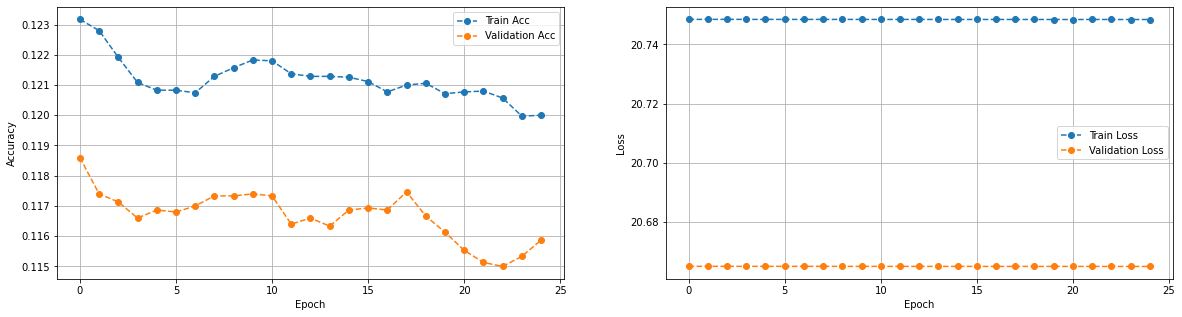

In [14]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [15]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 3s 9ms/step - loss: 20.7484 - accuracy: 0.1194 - val_loss: 20.6650 - val_accuracy: 0.1160
Epoch 2/30
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1193 - val_loss: 20.6650 - val_accuracy: 0.1162
Epoch 3/30
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1193 - val_loss: 20.6650 - val_accuracy: 0.1159
Epoch 4/30
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1190 - val_loss: 20.6650 - val_accuracy: 0.1160
Epoch 5/30
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1188 - val_loss: 20.6650 - val_accuracy: 0.1157
Epoch 6/30
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1188 - val_loss: 20.6650 - val_accuracy: 0.1157
Epoch 7/30
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1185 - val_loss: 20.6650 - val_accuracy:

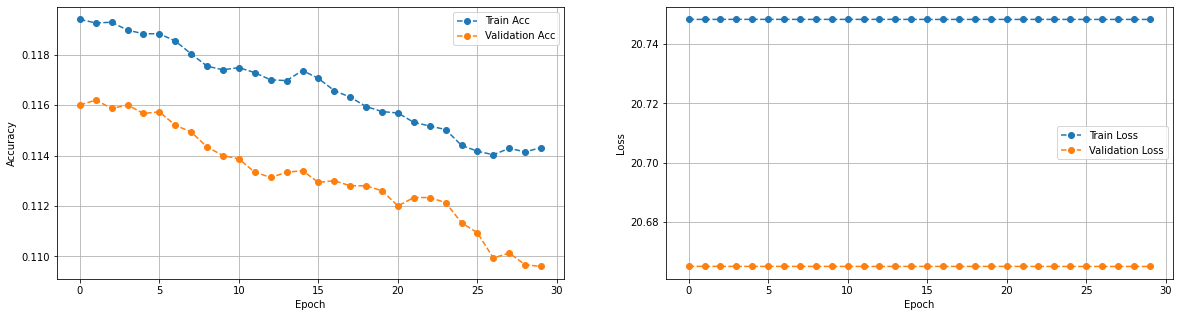

In [16]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [17]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 3s 9ms/step - loss: 20.7484 - accuracy: 0.1143 - val_loss: 20.6650 - val_accuracy: 0.1099
Epoch 2/35
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1139 - val_loss: 20.6650 - val_accuracy: 0.1097
Epoch 3/35
274/274 [==============================] - 2s 8ms/step - loss: 20.7484 - accuracy: 0.1133 - val_loss: 20.6650 - val_accuracy: 0.1095
Epoch 4/35
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1133 - val_loss: 20.6650 - val_accuracy: 0.1093
Epoch 5/35
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1130 - val_loss: 20.6650 - val_accuracy: 0.1095
Epoch 6/35
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1131 - val_loss: 20.6650 - val_accuracy: 0.1099
Epoch 7/35
274/274 [==============================] - 2s 7ms/step - loss: 20.7484 - accuracy: 0.1130 - val_loss: 20.6650 - val_accuracy:

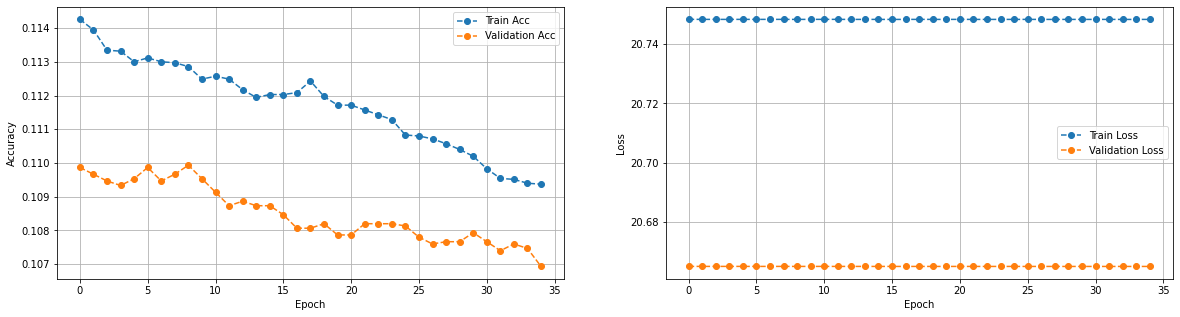

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [19]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 3s 9ms/step - loss: 20.7483 - accuracy: 0.1093 - val_loss: 20.6650 - val_accuracy: 0.1065
Epoch 2/40
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1090 - val_loss: 20.6650 - val_accuracy: 0.1067
Epoch 3/40
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1089 - val_loss: 20.6650 - val_accuracy: 0.1068
Epoch 4/40
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1087 - val_loss: 20.6650 - val_accuracy: 0.1071
Epoch 5/40
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1084 - val_loss: 20.6650 - val_accuracy: 0.1071
Epoch 6/40
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1083 - val_loss: 20.6650 - val_accuracy: 0.1069
Epoch 7/40
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1081 - val_loss: 20.6650 - val_accuracy:

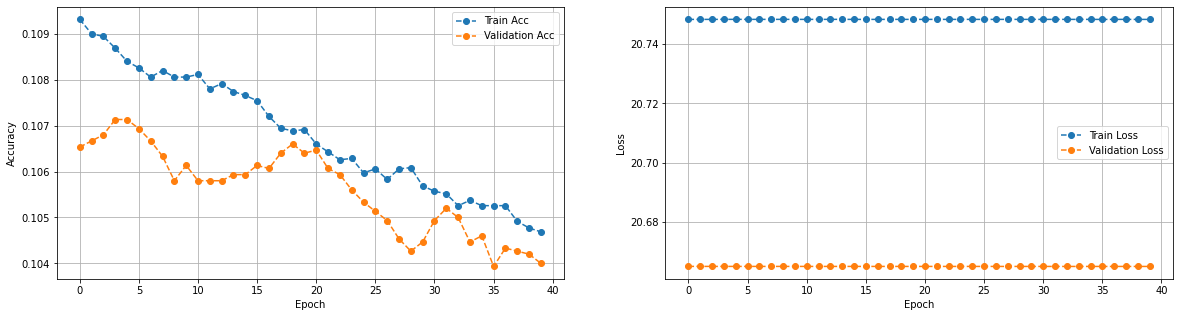

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [21]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 2s 9ms/step - loss: 20.7483 - accuracy: 0.1047 - val_loss: 20.6650 - val_accuracy: 0.1037
Epoch 2/45
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1047 - val_loss: 20.6650 - val_accuracy: 0.1035
Epoch 3/45
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1047 - val_loss: 20.6650 - val_accuracy: 0.1032
Epoch 4/45
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1049 - val_loss: 20.6650 - val_accuracy: 0.1031
Epoch 5/45
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1050 - val_loss: 20.6650 - val_accuracy: 0.1029
Epoch 6/45
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1048 - val_loss: 20.6650 - val_accuracy: 0.1026
Epoch 7/45
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1050 - val_loss: 20.6650 - val_accuracy:

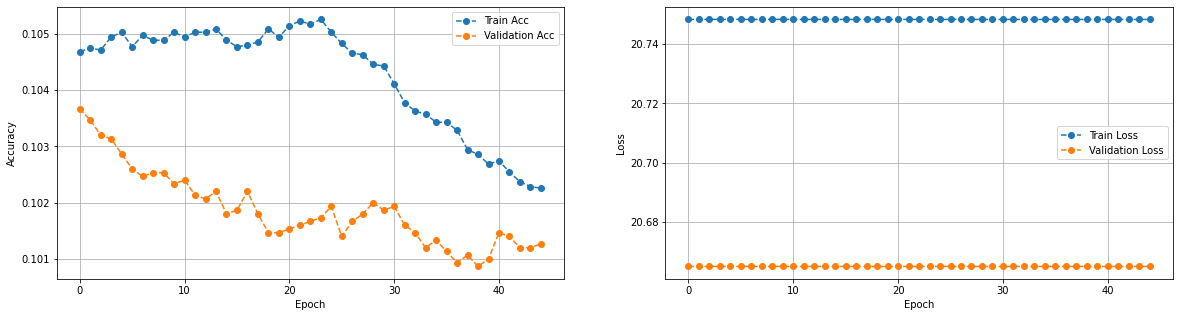

In [22]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [23]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 3s 9ms/step - loss: 20.7483 - accuracy: 0.1021 - val_loss: 20.6650 - val_accuracy: 0.1012
Epoch 2/50
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1022 - val_loss: 20.6650 - val_accuracy: 0.1008
Epoch 3/50
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1016 - val_loss: 20.6650 - val_accuracy: 0.1007
Epoch 4/50
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1016 - val_loss: 20.6650 - val_accuracy: 0.1004
Epoch 5/50
274/274 [==============================] - 2s 7ms/step - loss: 20.7483 - accuracy: 0.1015 - val_loss: 20.6650 - val_accuracy: 0.1006
Epoch 6/50
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1018 - val_loss: 20.6650 - val_accuracy: 0.1007
Epoch 7/50
274/274 [==============================] - 2s 8ms/step - loss: 20.7483 - accuracy: 0.1019 - val_loss: 20.6650 - val_accuracy:

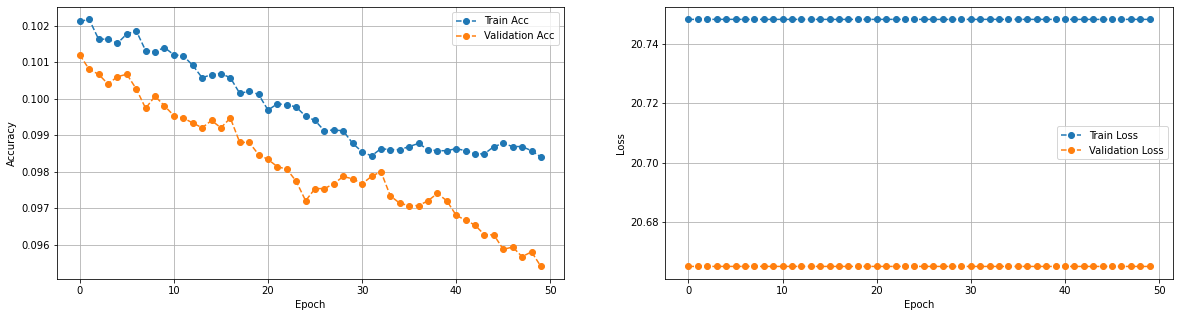

In [24]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()